In [23]:
from typing import List,TypedDict
from langgraph.graph import StateGraph, START, END
import random


class AgentState(TypedDict): #state schema
    name: str
    guesses: List[int]
    attempts: int
    lower_bound: int
    upper_bound: int
    guess_number: int
    current_guess: int
    

In [24]:
def setup_node(state: AgentState) -> AgentState:

    state['guesses'] = []
    state['attempts'] = 0
    state['lower_bound'] = 0
    state['upper_bound'] = 20
    state['guess_number'] = random.randint(state['lower_bound'],state['upper_bound'])
    state['current_guess'] = -1
    
    print (f"El numero a adivinar es {state['guess_number']}")
    
    return state

def guess_node(state: AgentState) -> AgentState:
    state['attempts'] += 1
    state['current_guess'] = random.randint(state['lower_bound'],state['upper_bound'])
    state['guesses'].append(state['current_guess'])
    return state

def hint_node(state: AgentState) -> AgentState:

    if state['current_guess'] == state['guess_number']:
        print(f"El numero es {state['current_guess']}, GANASTE")
        return state
    elif state['attempts'] == 7:
        print(f"El numero era {state['guess_number']}, PERDISTE")
        return state
    elif state['current_guess'] < state['guess_number']:
        print(f"El numero es mayor que {state['current_guess']}")
        state['lower_bound'] = state['current_guess']
        return state
    else :
        print(f"El numero es menor que {state['current_guess']}")
        state['upper_bound'] = state['current_guess']
        return state

    

def router_hint_node(state: AgentState):
    
    if state['current_guess'] == state['guess_number'] or state['attempts'] == 7:
        return 'end'
    else :
        return 'repeat'
    
    


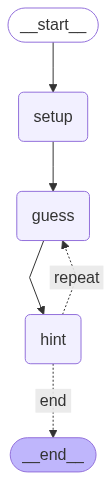

In [25]:
graph = StateGraph(AgentState)

graph.add_node('setup', setup_node)
graph.add_node('guess', guess_node)
graph.add_node('hint', hint_node)

graph.add_edge(START, 'setup')
graph.add_edge('setup', 'guess')
graph.add_edge('guess', 'hint')
graph.add_conditional_edges('hint',router_hint_node ,{'repeat': 'guess', 'end': END})

app = graph.compile()

app


In [26]:
app.invoke({'name': 'Alejandro'})

El numero a adivinar es 9
El numero es mayor que 1
El numero es 9, GANASTE


{'name': 'Alejandro',
 'guesses': [1, 9],
 'attempts': 2,
 'lower_bound': 1,
 'upper_bound': 20,
 'guess_number': 9,
 'current_guess': 9}